#### Import Libraries:

In [2]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from sklearn.feature_extraction.text import TfidfVectorizer

#### Import Data:

In [5]:
main_dir = 'D:/NLP Project/Arabic-Dialect-Identification-using-LLAMA-3/data/'
train = pd.read_csv(main_dir + "train.csv")
train_cleaned = pd.read_csv(main_dir + "train_cleaned.csv")
test_cleaned = pd.read_csv(main_dir + "test_cleaned.csv")

In [6]:
train_cleaned[train_cleaned["label"]=="Egypt"].tail(20).loc[29986]["text"]

'لمؤخذه يا ابو صلاح كان نفسي اتفرج عليك انهارده بس للاسف الاسماعيلي هيلعب الساعه و ده الاسماعيلي يعني بالتوفيق لابو صلاح و لدراويشنا'

### Exploratory Data Analysis (EDA)

- Visulize number of rows per label.
- Visulizde top 10 words in each dialect.
- Visulize the Length of the my dataframe text.

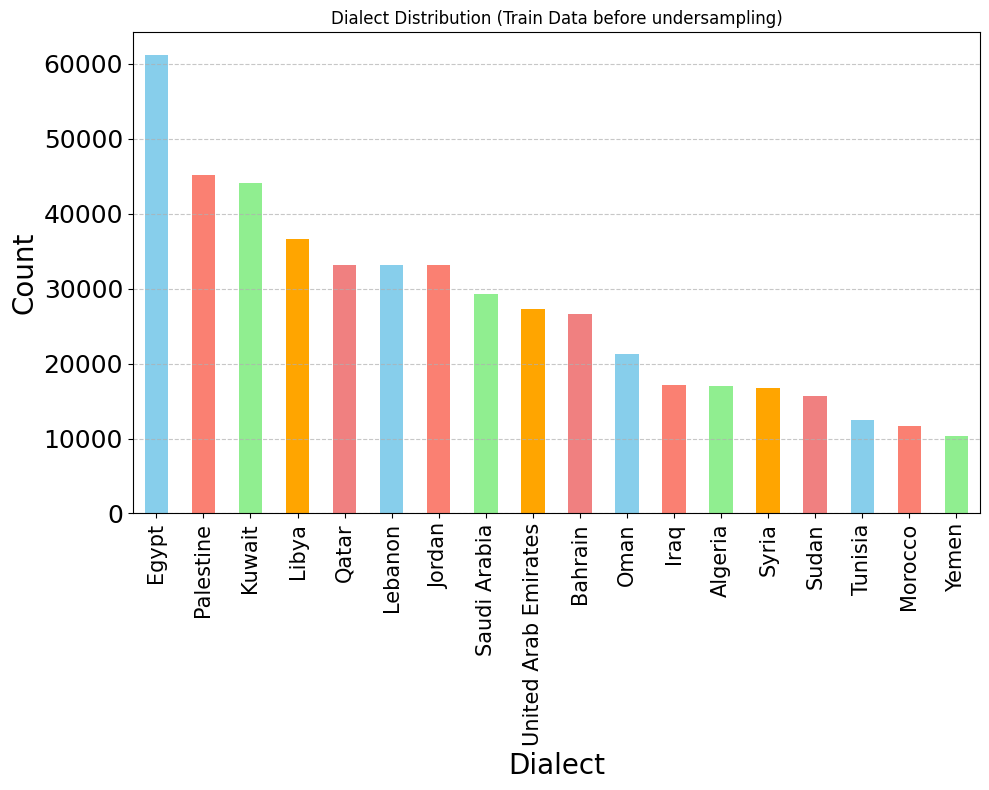

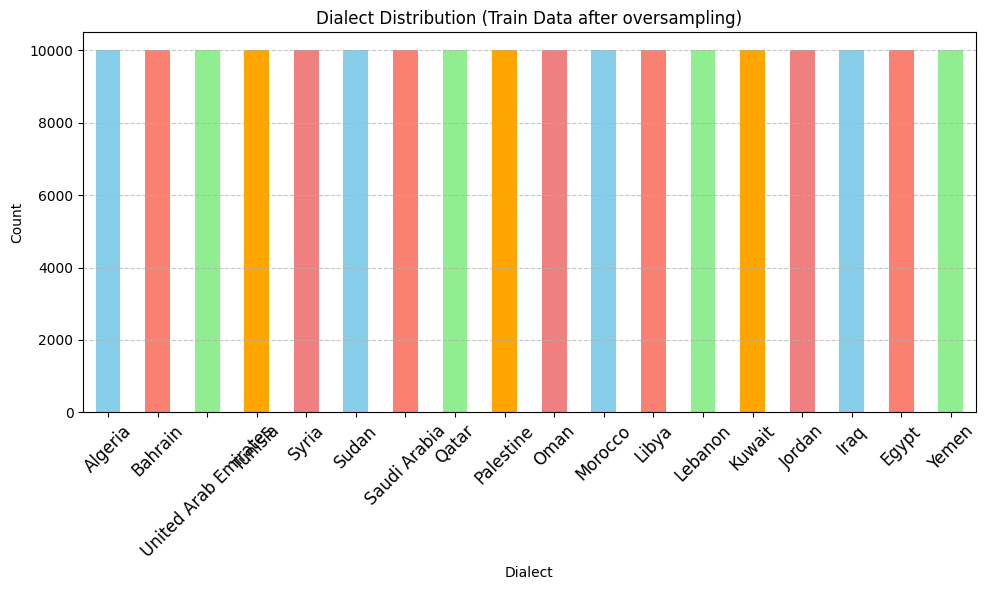

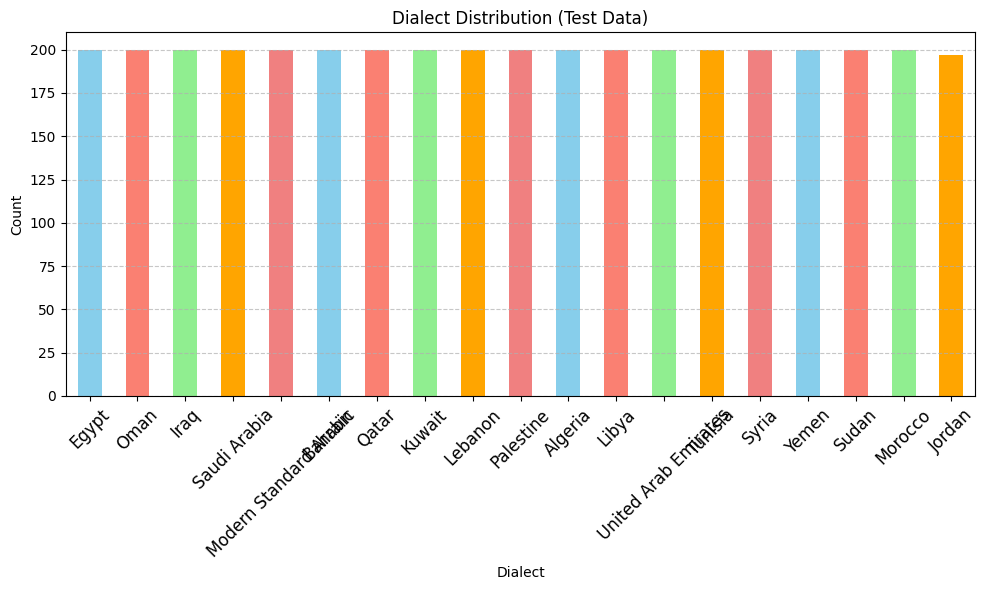

In [7]:
# Custom colors for each dialect
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# Plotting the first graph
plt.figure(figsize=(10, 8))
dialect_counts = train['label'].value_counts()
dialect_counts.plot(kind='bar', color=colors)
plt.title('Dialect Distribution (Train Data before undersampling)')
plt.xlabel('Dialect', fontsize=20) 
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=90, fontsize=15) 
plt.yticks(fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the second graph
plt.figure(figsize=(10, 6))
dialect_counts = train_cleaned['label'].value_counts()
dialect_counts.plot(kind='bar', color=colors)
plt.title('Dialect Distribution (Train Data after oversampling)')
plt.xlabel('Dialect')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=12)  # Increase font size here
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the third graph
plt.figure(figsize=(10, 6))
dialect_counts = test_cleaned['label'].value_counts()
dialect_counts.plot(kind='bar', color=colors)
plt.title('Dialect Distribution (Test Data)')
plt.xlabel('Dialect')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=12)  # Increase font size here
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---

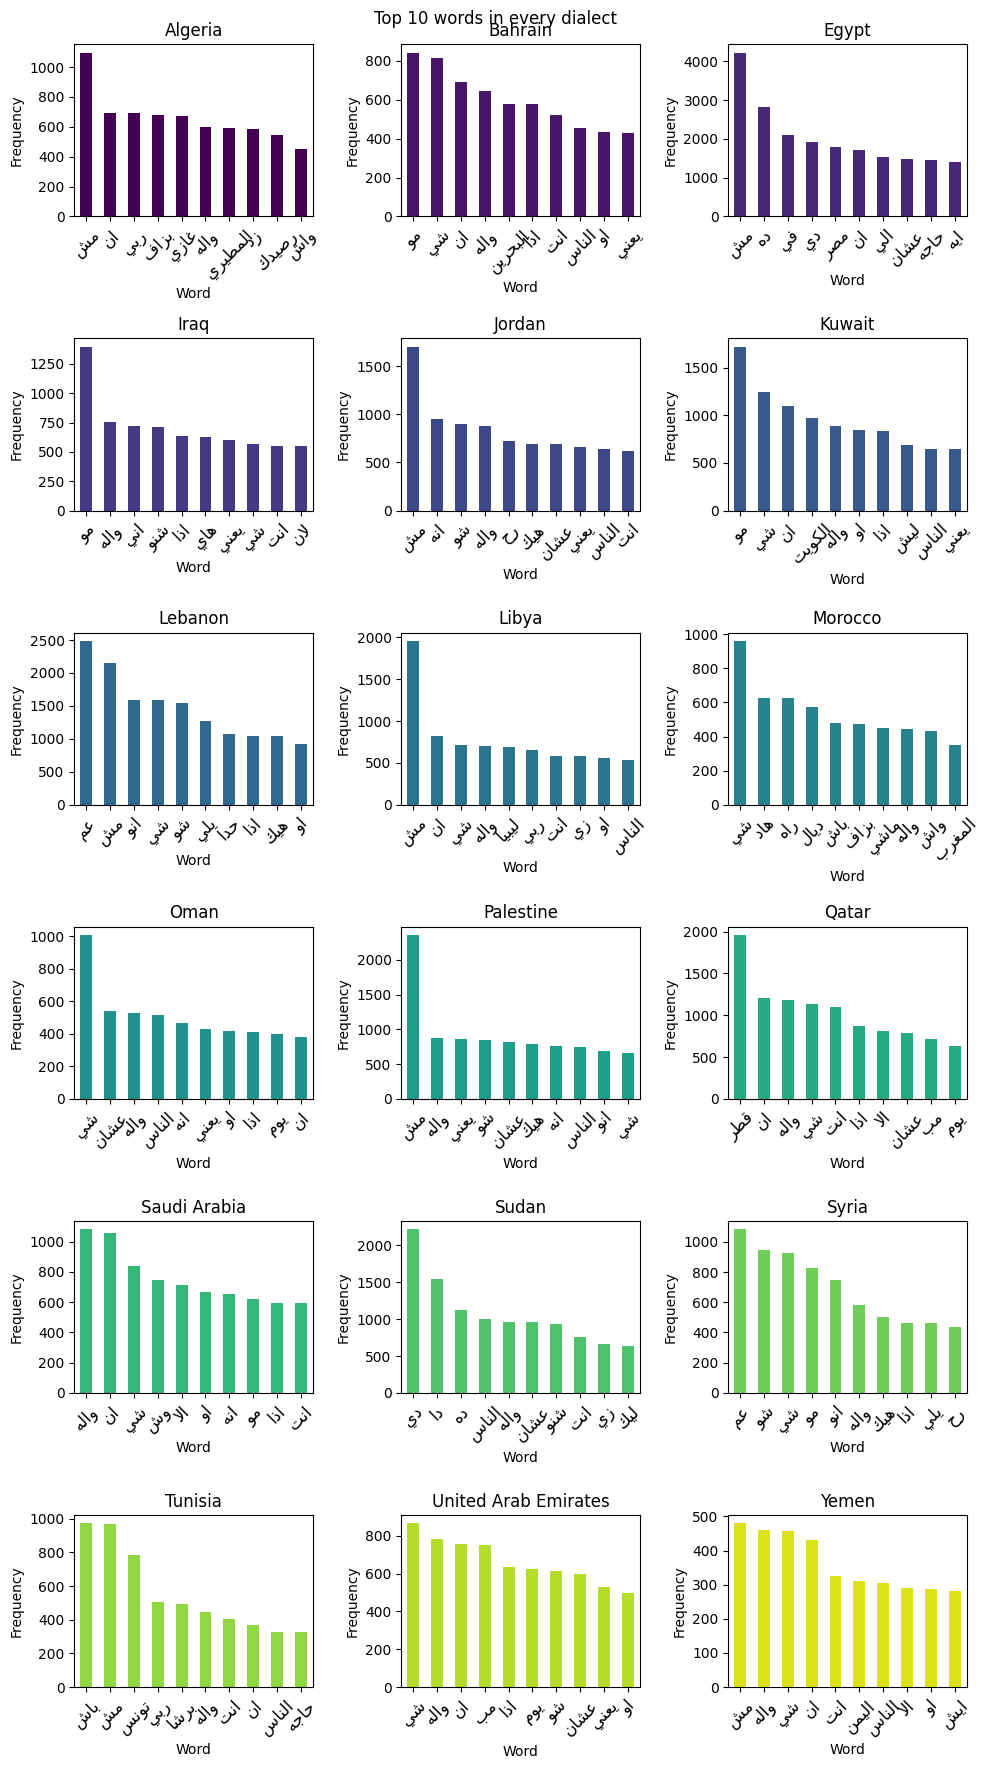

In [8]:
def plot_top_words_by_dialect(df, n=10):
    def get_top_words(df, dialect, n):
        dialect_df = df[df['label'] == dialect]
        word_counts = dialect_df['text_cleaned'].str.split(expand=True).stack().value_counts()
        top_n_words = word_counts.head(n)
        return top_n_words

    # Dialects to plot
    dialects = df['label'].unique()

    # Calculate number of rows and columns for subplots
    num_dialects = len(dialects)
    num_rows = (num_dialects - 1) // 3 + 1
    num_cols = min(num_dialects, 3)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
    fig.suptitle(f"Top {n} words in every dialect")

    # Plot top n words for each dialect
    for i, dialect in enumerate(dialects):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]
        top_words = get_top_words(df, dialect, n)
        # Convert Arabic text to correct format
        top_words_arabic = [get_display(arabic_reshaper.reshape(word)) 
                            for word in top_words.index]

        top_words.plot(kind='bar', color=plt.cm.viridis(i / num_dialects), ax=ax)
        ax.set_title(dialect)
        ax.set_xlabel('Word')
        ax.set_ylabel('Frequency')

        # Set Arabic text as tick labels
        ax.set_xticklabels(top_words_arabic, fontsize=12, rotation=45)

    # Remove empty subplots
    for i in range(num_dialects, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        if num_rows > 1:
            fig.delaxes(axes[row, col])
        else:
            fig.delaxes(axes[col])

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_top_words_by_dialect(train_cleaned, n=10)

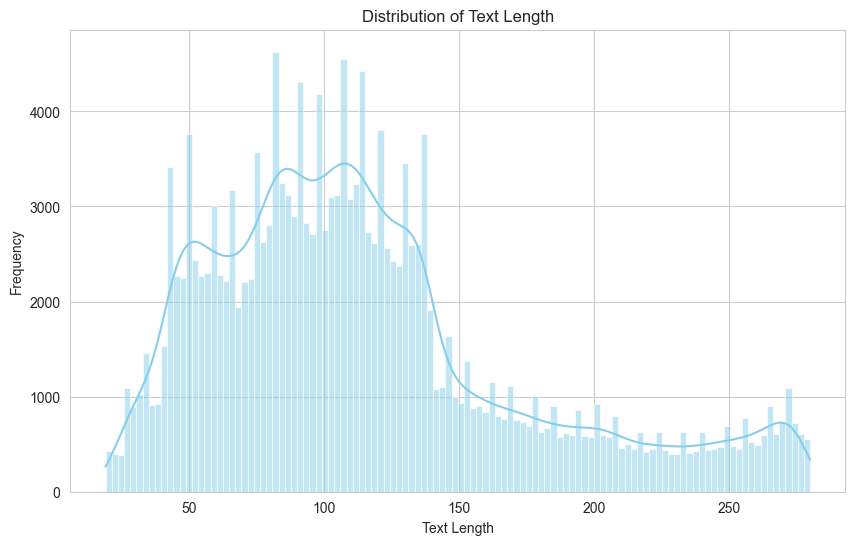

In [10]:
# Set the style for the plot
sns.set_style("whitegrid")

# Plot the distribution of text_length
plt.figure(figsize=(10, 6))
sns.histplot(train_cleaned['text_length'], kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()